# Amazon Best Seller in Women Cocktail Dresses

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from random import randint
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

In [141]:
nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

[nltk_data] Downloading package names to /Users/mingtsung/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mingtsung/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/mingtsung/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/mingtsung/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/mingtsung/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mingtsung/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mingtsung/nltk_data...
[nltk_data] Down

True

Load Data

In [479]:
dresses = pd.read_csv('amazon_dresses2.csv')
dresses.head()

,name,price,seller,rating,top_reviews,rating_count,question_count
0,MEROKEETY Women's Sleeveless Lace Floral Elega...,50.99,Visit the MEROKEETY Store,4.4 out of 5,['Beautiful dress! I ordered for a wedding and...,"16,522",159
1,ECOWISH Womens V-Neck Spaghetti Strap Bowknot ...,34.99,Visit the ECOWISH Store,3.8 out of 5,"['♡ fair impressed now, I must say. I ordered ...","17,009",147
2,GRACE KARIN Women's Sleeveless Wrap V-Neck A-l...,38.99,Visit the GRACE KARIN Store,4.3 out of 5,"[""Yo! Rolled outta bed & my dress was here rig...","21,939",124
3,Sarin Mathews Womens Off The Shoulder Short Sl...,38.99,Visit the Sarin Mathews Store,4.3 out of 5,"[""I ordered this dress just to switch up my us...","29,446",471
4,Miusol Women's Retro Ruffle Style Slim Work Pe...,36.99,Visit the Miusol Store,4.3 out of 5,['This is a really attractive dress. The style...,"2,759",12


Change Data Format and Data Type

In [480]:
dresses.price.astype(float)
dresses.question_count.astype(int)
dresses['name'] = dresses['name'].apply(lambda x: str.lower(x))
dresses['rating'] = dresses['rating'].apply(lambda x: x[:1]+'.0' if x[2]=='o' else x[:3]).astype(float)
dresses['seller'] = dresses['seller'].apply(lambda x: str.strip(str.lower(x[10:-6])) if x[:5] == 'Visit' else (str.strip(str.lower(x[6:])) if x[:5] == 'Brand' else str.strip(str.lower(x))))
dresses['rating_count'] = dresses['rating_count'].apply(lambda x: x.replace(',','')).astype(int)

Applying sentiment analytics to score top reviews.

The more positive the reviews are the higher score the item get.

In [481]:
sia = SentimentIntensityAnalyzer()
dresses['reviews_pos'] = dresses['top_reviews'].apply(lambda x: sia.polarity_scores(x)['pos']).astype(float)
dresses.head()

,name,price,seller,rating,top_reviews,rating_count,question_count,reviews_pos
0,merokeety women's sleeveless lace floral elega...,50.99,merokeety,4.4,['Beautiful dress! I ordered for a wedding and...,16522,159,0.191
1,ecowish womens v-neck spaghetti strap bowknot ...,34.99,ecowish,3.8,"['♡ fair impressed now, I must say. I ordered ...",17009,147,0.240
2,grace karin women's sleeveless wrap v-neck a-l...,38.99,grace karin,4.3,"[""Yo! Rolled outta bed & my dress was here rig...",21939,124,0.247
3,sarin mathews womens off the shoulder short sl...,38.99,sarin mathews,4.3,"[""I ordered this dress just to switch up my us...",29446,471,0.211
4,miusol women's retro ruffle style slim work pe...,36.99,miusol,4.3,['This is a really attractive dress. The style...,2759,12,0.243


Filiter the seller with item count larger than 1, then find the average price, rating, numbers of rate, numbers of answered questions, and review score.

In [388]:
dress_seller = dresses.groupby('seller').count().name
seller_stat = dresses.groupby('seller').mean()
seller_stat['count'] = dress_seller.astype(int)
seller_stat_target = seller_stat[seller_stat['count'] > 1]
seller_stat_target

,price,rating,rating_count,question_count,reviews_pos,count
seller,,,,,,
aisize,41.656667,4.333333,5491.333333,59.000000,0.276000,3
babeyond,52.990000,4.525000,3190.500000,82.250000,0.233250,4
bbonlinedress,38.490000,4.300000,13780.000000,114.500000,0.241000,2
berylove,47.323333,4.266667,4535.666667,83.000000,0.218333,3
dresstells,37.740000,4.300000,9596.250000,117.750000,0.231250,4
dressystar,38.517143,4.400000,9421.000000,198.142857,0.245571,7
ecowish,33.980000,4.000000,9130.500000,86.500000,0.202500,2
gardenwed,40.490000,4.150000,4644.500000,86.000000,0.214000,2
gowntown,36.490000,4.500000,4524.500000,122.500000,0.187000,2


# Analyzing cocktail dresses market

Market share in cocktail dresses top seller.

([<matplotlib.patches.Wedge at 0x7f7e32b2cfd0>,
 [Text(1.094864798179856, 0.10616531310453263, 'gowntown'),
  Text(1.0376429934002598, 0.3650986418043056, 'muxxn'),
  Text(0.9201171479581685, 0.6028137639713663, 'ecowish'),
  Text(0.7871588517689486, 0.7683625069469427, 'owin'),
  Text(0.6248712152918695, 0.9052822567021086, 'gardenwed'),
  Text(0.39006536556155164, 1.0285178708167073, 'berylove'),
  Text(0.13259033402644574, 1.091979763238658, 'pinup fashion'),
  Text(-0.18519275992872952, 1.0842986865573434, 'grace karin'),
  Text(-0.5804042813031935, 0.934414720691473, 'dresstells'),
  Text(-0.8233618331667372, 0.7294349125756939, 'hanpceirs'),
  Text(-0.9975618035290404, 0.46354120436039814, 'babeyond'),
  Text(-1.0884570416998254, 0.1589379387498923, 'bbonlinedress'),
  Text(-1.094864796316122, -0.10616533232490248, 'prettyguide'),
  Text(-0.9201171373757626, -0.6028137801240382, 'dressystar'),
  Text(-0.5804042430279723, -0.9344147444658216, 'missmay'),
  Text(-0.3900653475059026

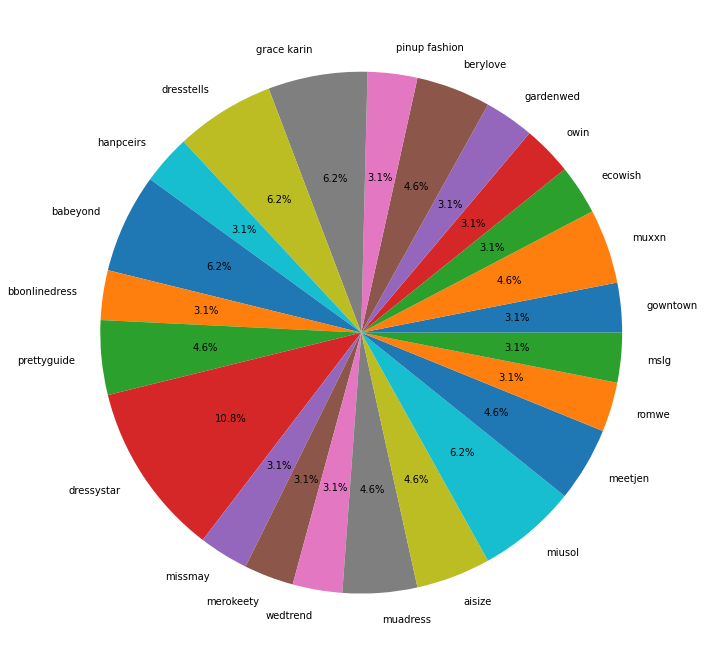

In [482]:
fig, ax=plt.subplots(figsize=(16, 12))
plt.pie(seller_stat_target['count'], labels=seller_stat_target.index, autopct='%1.1f%%')

Compare average price, rating, numbers of rate, numbers of answered questions, and review score in different seller

Text(0.5, 0, 'Price')

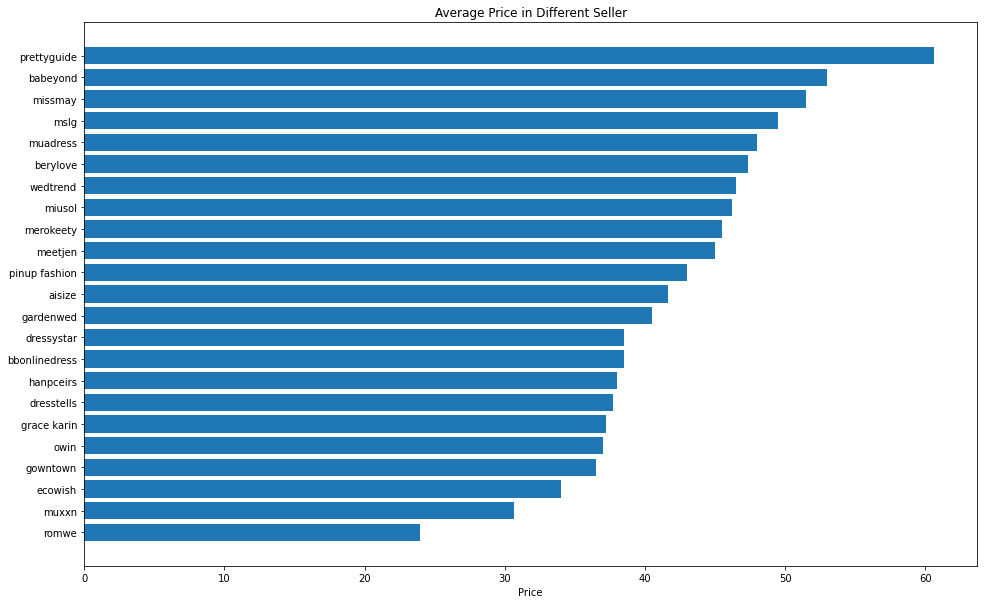

In [514]:
#price
fig, ax=plt.subplots(figsize=(16, 10))
seller_stat_target = seller_stat_target.sort_values('price')
plt.barh(seller_stat_target.index,seller_stat_target.price)
plt.title('Average Price in Different Seller')
plt.xlabel('Price')

Text(0.5, 0, 'Rating')

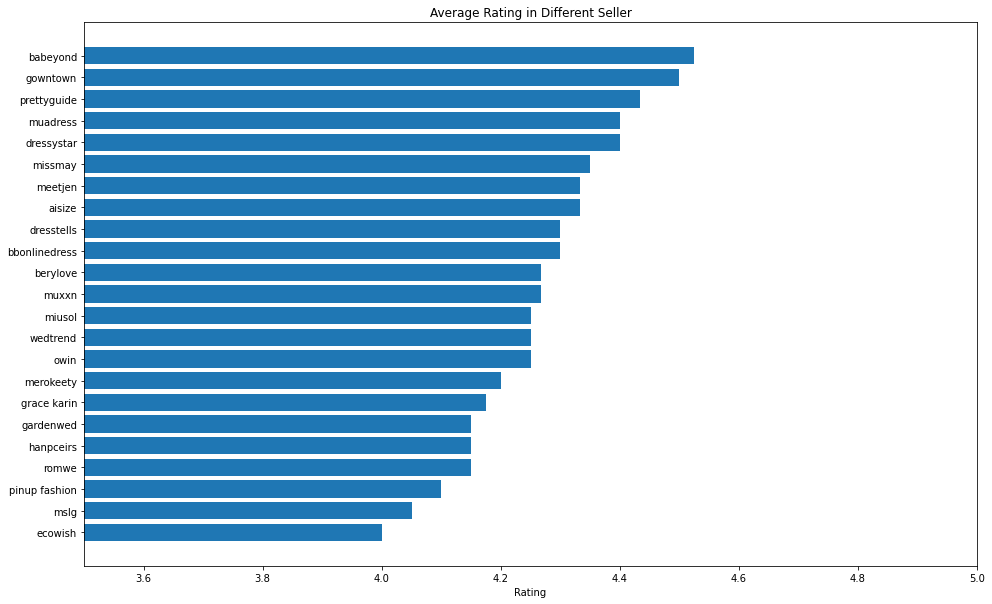

In [515]:
#rating
fig, ax=plt.subplots(figsize=(16, 10))
seller_stat_target = seller_stat_target.sort_values('rating')
plt.xlim(3.5,5)
plt.barh(seller_stat_target.index,seller_stat_target.rating)
plt.title('Average Rating in Different Seller')
plt.xlabel('Rating')

Text(0.5, 0, 'Numbers of Rating')

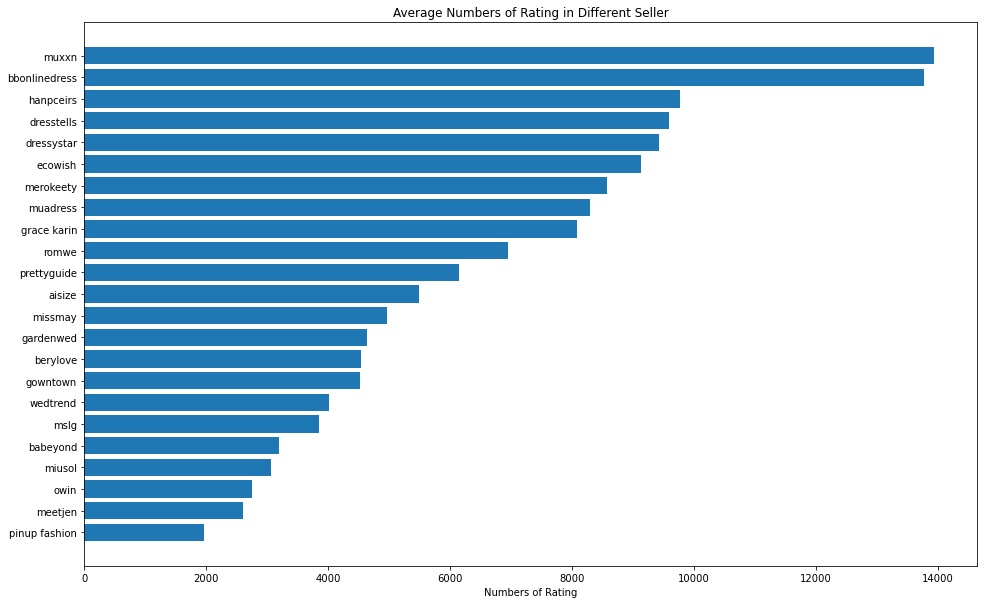

In [516]:
#rating_count
fig, ax=plt.subplots(figsize=(16, 10))
seller_stat_target = seller_stat_target.sort_values('rating_count')
plt.barh(seller_stat_target.index,seller_stat_target.rating_count)
plt.title('Average Numbers of Rating in Different Seller')
plt.xlabel('Numbers of Rating')

Text(0.5, 0, 'Numbers of Answered Questions')

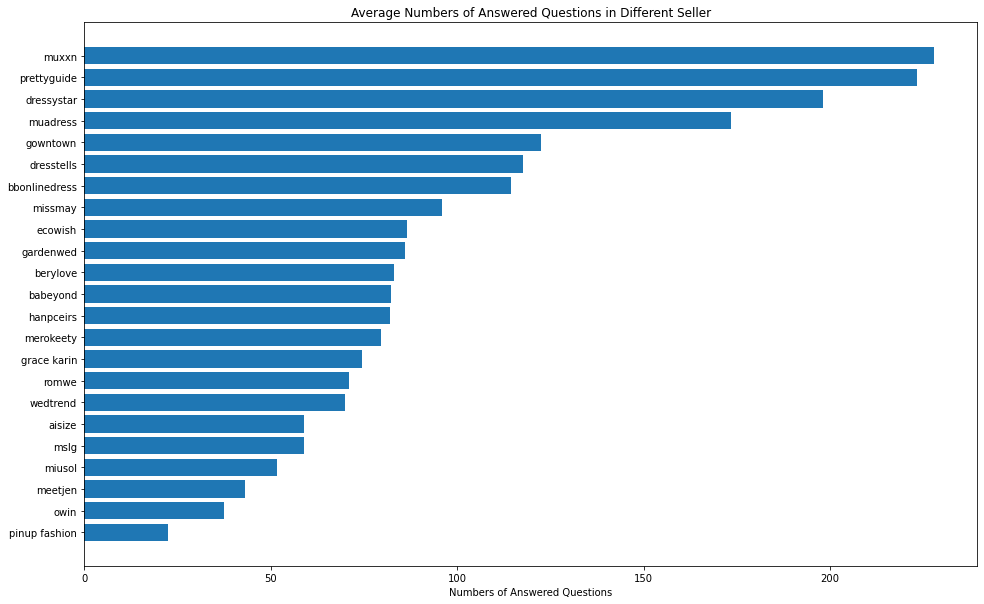

In [517]:
#question
fig, ax=plt.subplots(figsize=(16, 10))
seller_stat_target = seller_stat_target.sort_values('question_count')
plt.barh(seller_stat_target.index,seller_stat_target.question_count)
plt.title('Average Numbers of Answered Questions in Different Seller')
plt.xlabel('Numbers of Answered Questions')

Text(0.5, 0, 'Review Score')

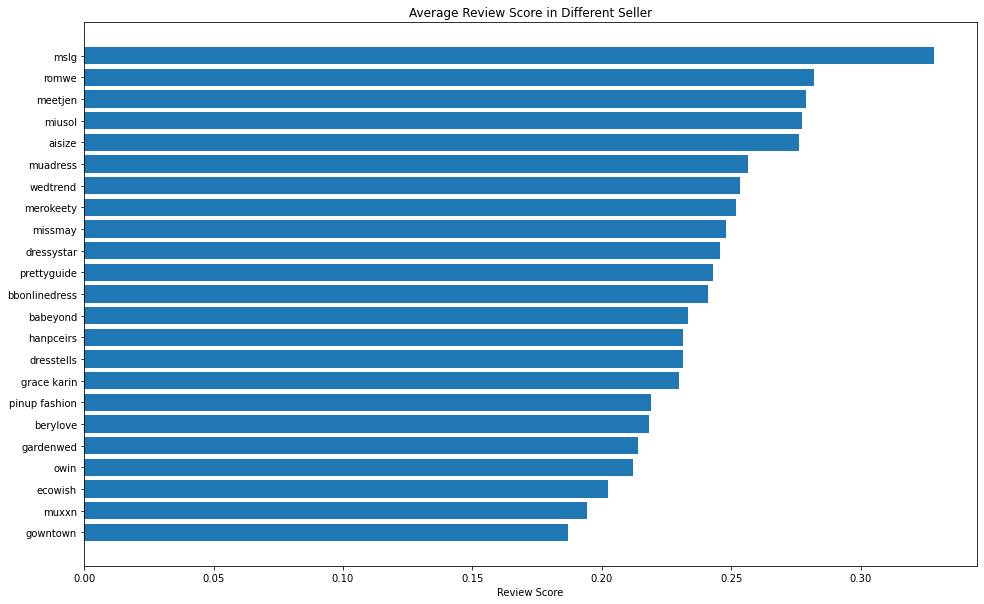

In [518]:
#review score
fig, ax=plt.subplots(figsize=(16, 10))
seller_stat_target = seller_stat_target.sort_values('reviews_pos')
plt.barh(seller_stat_target.index,seller_stat_target.reviews_pos)
plt.title('Average Review Score in Different Seller')
plt.xlabel('Review Score')

Design a scoring method to score the items

Method:

total point = 0.35 * price + 1 * rating + 0.75 * numbers of rating + 0.5 * numbers of answered question + 1.5 * review score

In [508]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler()
scaler2 = preprocessing.MinMaxScaler()
seller_score = seller_stat_target.drop('count', axis =1)
#Assumption: Price has negative relationship with purchase intention
seller_score['price'] = max(seller_score.price) - seller_score['price']
score = scaler1.fit_transform(seller_score)
score = scaler2.fit_transform(score)
total_score = []
for i in score:
    total_score.append(0.35*i[0]+i[1]+0.75*i[2]+0.5*i[3]+1.5*i[4])
score = pd.DataFrame(score, index = seller_score.index, columns = seller_score.columns) 
score['total'] = total_score

In [509]:
score

,price,rating,rating_count,question_count,reviews_pos,total
seller,,,,,,
pinup fashion,0.481818,0.190476,0.000000,0.000000,0.226148,0.698335
meetjen,0.427273,0.634921,0.053239,0.099757,0.650177,1.849539
owin,0.645455,0.476190,0.065332,0.072993,0.176678,1.052612
miusol,0.393182,0.476190,0.090734,0.142336,0.637809,1.709736
babeyond,0.209091,1.000000,0.101984,0.290754,0.326855,1.785330
mslg,0.304545,0.095238,0.157464,0.177616,1.000000,1.908735
wedtrend,0.386364,0.476190,0.171115,0.231144,0.469965,1.560273
gowntown,0.659091,0.952381,0.213361,0.486618,0.000000,1.586393
berylove,0.363636,0.507937,0.214294,0.294404,0.221437,1.275287


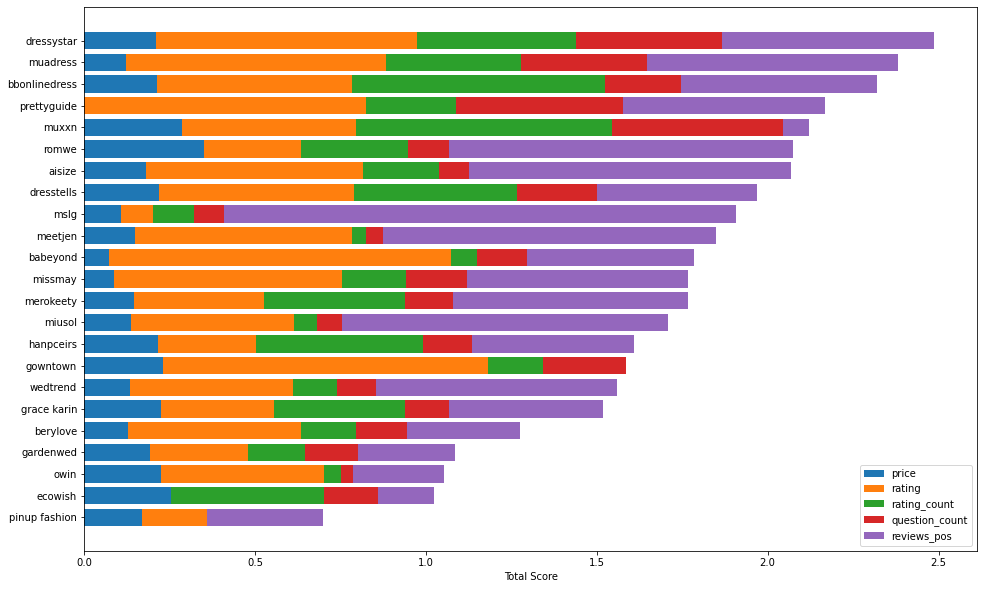

In [526]:
#bar chart of the final score
score = score.sort_values('total')
fig, ax=plt.subplots(figsize=(16, 10))
plt.barh(score.index, score.price*0.35, label = 'price')
plt.barh(score.index, score.rating, left = score.price*0.35, label = 'rating')
plt.barh(score.index, score.rating_count*0.75, left = score.price*0.35+score.rating, label = 'rating_count')
plt.barh(score.index, score.question_count*0.5, left = score.price*0.35+score.rating+score.rating_count*0.75, label = 'question_count')
plt.barh(score.index, score.reviews_pos*1.5, left = score.price*0.35+score.rating+score.rating_count*0.75+score.question_count*0.5, label = 'reviews_pos')
plt.xlabel('Total Score')
plt.legend()

The best 3 sellers are: dressystar, muadress, bbonlinedress

Price: the higher point it get, the lower the price is.

Rating: point from customers (maximum 5 stars).

Sales: using rating_count as an indicator. Assumption: the rating proportion of customers is the same in each dress.

Customer service: using question_count as an indicator. Assumption: The more question the seller answered the better the customer service is.

Satisfaction from customer: using the review positive point to figure out the satisfaction of the customers.

Seller:

dressystar: High cost performance ratio. Received the high score with slightly lower price in all sellers. (High rating, average sales, customer service, and satisfication.)

romwe: Best choice for those limited budget. Scoring good point with the lowest price.(Slightly low rating, low sales and customer service, but high satisfication.)

prettyguide: Awesome customer service and feedbacks with the highest price. Second highest rate, and high satisfaction from customers.(Great choice for those do not care about the price a lot.) 

mslg: Slightly high price, low rating, sales, and customer service, but with the highest customer satisfaction point. (Polarized thoughts for different customers.)


Text(53, 4, 'Area: Review Score')

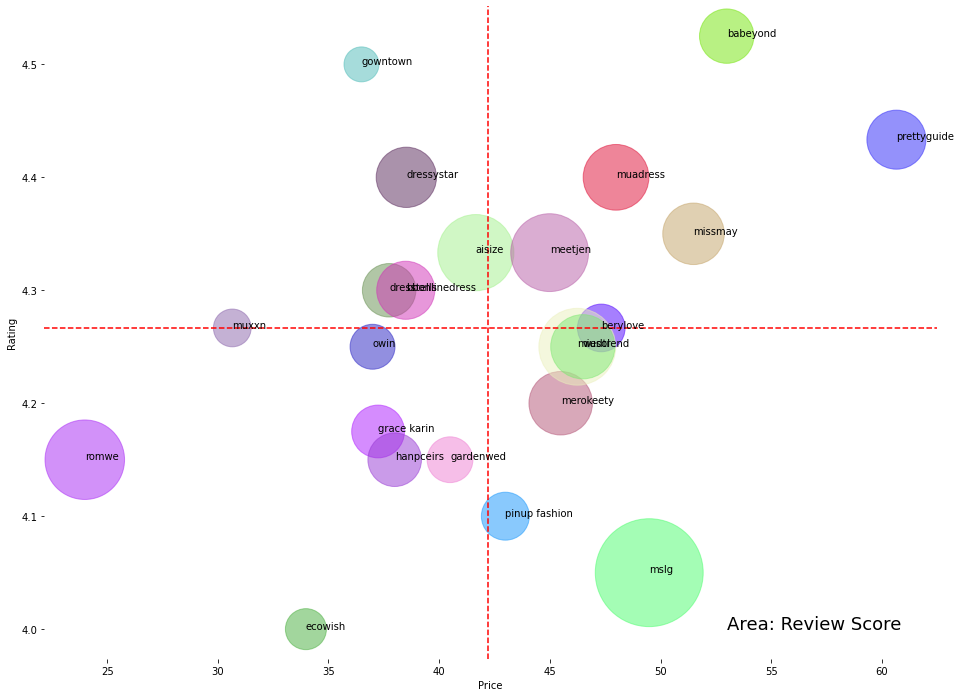

In [542]:
mean_price = seller_stat_target.price.mean()
mean_rating = seller_stat_target.rating.mean()
color = []
n = len(seller_stat_target)
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))
fig, ax=plt.subplots(figsize=(16, 12))
plt.axhline(mean_rating,linestyle="dashed", color='red')
plt.axvline(mean_price,linestyle="dashed",color='red')
plt.scatter(seller_stat_target.price, seller_stat_target.rating, c=color, s=seller_stat_target.reviews_pos**4*1000000, alpha=0.5)
for i, label in enumerate(seller_stat_target.index):
    plt.annotate(label, (seller_stat_target.price[i], seller_stat_target.rating[i]))
plt.xlabel('Price')
plt.ylabel('Rating')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.text(53, 4, "Area: Review Score", fontsize = 18, fontstretch = 'expanded')

Suggestions:

Pursuing best cost performance dresses: dressystar, gowntown

Pursuing best dresses: babeyond, gowntown, prettyguide

Pursuing cheapest dresses: romwe

Pursuing high customer satisfaction dresses: mslg, aisize, meetjen

# Wordcloud for titles and reviews

Cleaning words in titles

In [502]:
title_tok =  [word_tokenize(title) for title in dresses.name]
clean_title_tok = []
for title in title_tok:
    clean = []
    for word in title:
        res = re.sub(r'[^\w\s]',"", word)
        if res != "":
            clean.append(res)
    clean_title_tok.append(clean)

In [503]:
clean_title_tok2 =[]
for title in clean_title_tok:
    w = []
    for word in title:
        if not word in stopwords.words('english'):
            w.append(word)
    clean_title_tok2.append(w)

In [466]:
port = PorterStemmer()
clean_title_tok3 = []
for title in clean_title_tok2:
    w = []
    for word in title:
        p_word = port.stem(word)
        if not p_word in ['cocktail', 'dress', 'women']:
            w.append(p_word)
    clean_title_tok3.append(w)

In [506]:
wordcloud_string = ""
for title in clean_title_tok3:
    for word in title:
        wordcloud_string += word
        wordcloud_string += " "

Wordcloud for titles

/Users/mingtsung/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:2911: DecompressionBombWarning: Image size (96503220 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


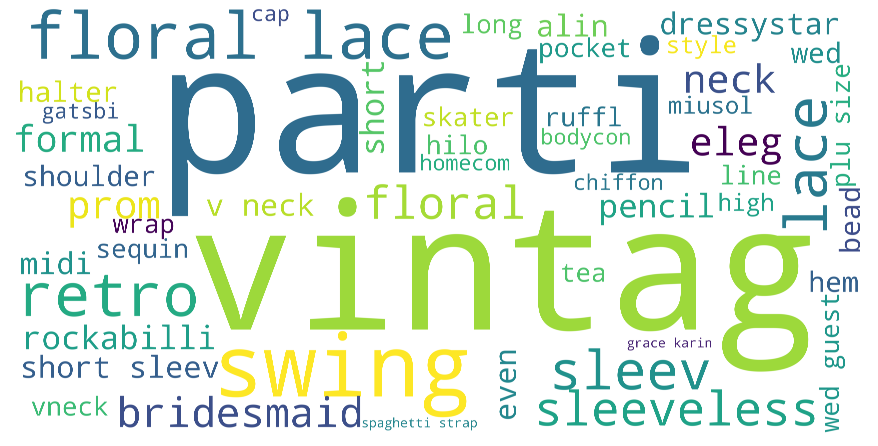

In [507]:
wordcloud = WordCloud(background_color="white", scale=64, max_words=50).generate(wordcloud_string)
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Top 5 Common words use in best seller's title:

Party, Vintage, Swing, Floral, and Lace.

Cleaning words in top reviews

In [474]:
reviews = ""
for i in dresses.top_reviews:
    reviews += i
    reviews += " "
reviews_tok = word_tokenize(reviews)
reviews_tok
clean_reviews_tok = []
for r in reviews_tok:
    res = re.sub(r'[^\w\s]',"", r)
    if res != "":
        clean_reviews_tok.append(res)
     

clean_reviews_tok2 = []
for word in clean_reviews_tok:
    if not word in stopwords.words('english'):
        clean_reviews_tok2.append(word)

#port = PorterStemmer()
#clean_reviews_tok3 = []
#for word in clean_reviews_tok2:
#    p_word = port.stem(word)
#    clean_reviews_tok3.append(p_word)

clean_reviews_tok4 = []
for word in clean_reviews_tok2:
    if not word in ['dress', 'dresses']:
        clean_reviews_tok4.append(word)

In [475]:
wordcloud_reviews = ""
for word in clean_reviews_tok4:
    wordcloud_reviews += word
    wordcloud_reviews += " "

Wordcloud for top reviews

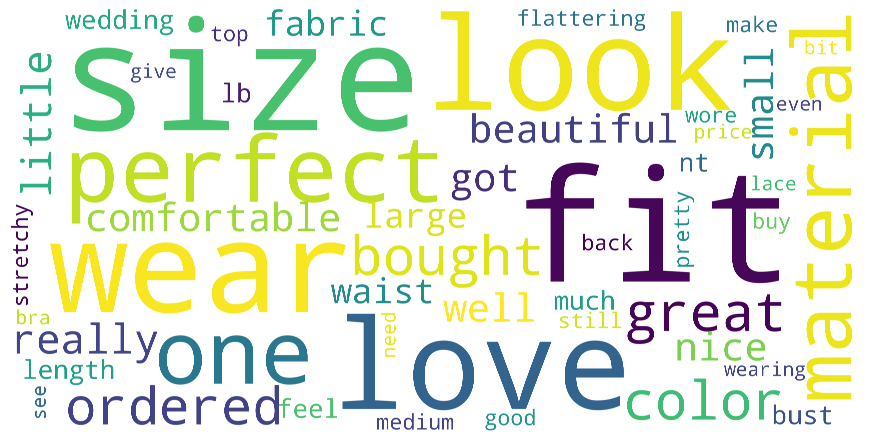

In [476]:
wordcloud = WordCloud(background_color="white", scale=64, max_words=50).generate(wordcloud_reviews)
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

What do customers care the most?

Size(Fit), Appearance(look), and Material.